In this jupyter the proposed workflow is applied on Barra reservoir data set.


# Libraries

In [ ]:
import import_ipynb
import net1_model
import net1_post_processing
import Detect_RoI
import net2_model
import performance_evaluation
import cv2
import matplotlib.pyplot as plt

importing Jupyter notebook from net1_model.ipynb
importing Jupyter notebook from net1_post_processing.ipynb
importing Jupyter notebook from Detect_RoI.ipynb
importing Jupyter notebook from net2_model.ipynb
Segmentation Models: using `keras` framework.
importing Jupyter notebook from performance_evaluation.ipynb


# Phase-1

## Semantic segmentation (reservoir and non-reservoir)

In [ ]:
net1_patches = 'barra_net1_patches/'
net1_output_addr = 'barra_net1_output/'

net1_model.model(rgb_addr=net1_patches+'rgb/', addr_to_save= net1_output_addr)

### Output samples:

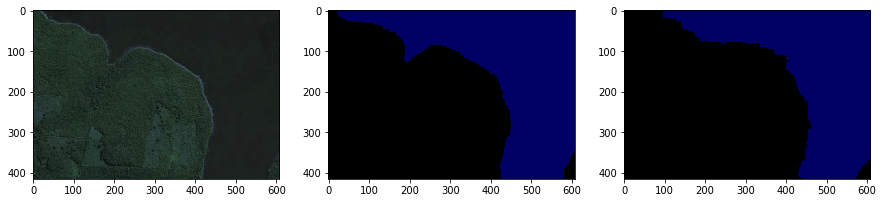

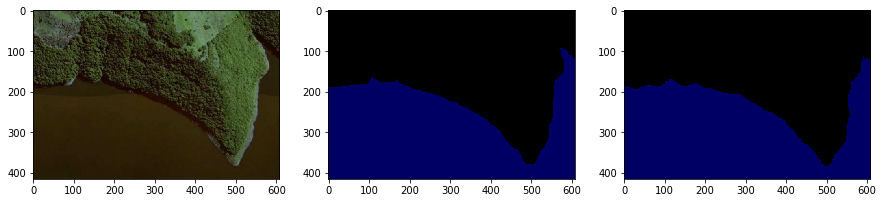

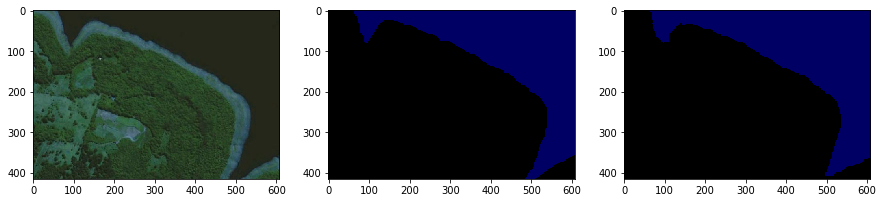

In [ ]:
d = os.listdir('barra_net1_output/')
n = [61,90,105]
for i in n:
    nt = net1_patches+'anno/'+d[i]
    im = cv2.imread(nt)[:,:,0]
    n = 'barra_net1_output/'+d[i]
    pre = np.floor(cv2.imread(n)[:,:,2]/190)

    nn = net1_patches+'rgb/'+d[i]

    fig, axs = plt.subplots(1, 3,figsize=(15, 10))

    axs[0].imshow(cv2.imread(nn))

    im = np.zeros((416,608,3))
    im[:,:,2] = cv2.imread(nt)[:,:,0] *100
    axs[1].imshow(im.astype(np.uint8))

    im = im*0
    im[:,:,2] = pre*100
    axs[2].imshow(im.astype(np.uint8))

    plt.show()


### Evaluation

In [ ]:
performance_evaluation.evaluate(net1_patches+'anno/',net1_output_addr,1)

(112047104,) (112047104,)
performance :
              precision    recall  f1-score   support

           0     0.9839    0.9686    0.9762  94920788
           1     0.8400    0.9121    0.8745  17126316

    accuracy                         0.9600 112047104
   macro avg     0.9119    0.9404    0.9254 112047104
weighted avg     0.9619    0.9600    0.9607 112047104



## Net1-post processing

number of patches:  443
assembled predition outputs :


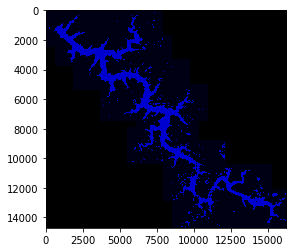

final post processing output:


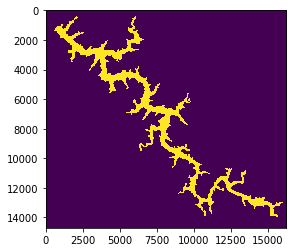

In [ ]:
#names:
mosaic_img = 'barra_mosaic.png'
pre_assemble_addr=  'barra_mosaic_pre_img.png'
refined_addr =  'barra_refined_prediction.png'

# Assemble model outputs:
net1_post_processing.assemble(cv2.imread(mosaic_img).shape,pre_address=net1_output_addr,patchx=416,patchy=608,output_name=pre_assemble_addr)

# Morphologycal and rule-based refinments:
net1_post_processing.morpho_and_rulebased_refinmnets(resolution=2,mosaic_addr=pre_assemble_addr,addr_to_save= refined_addr )


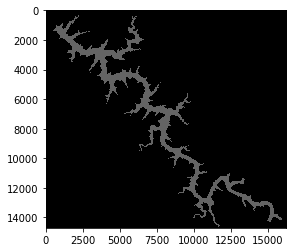

In [ ]:
# barra reservoir ground truth:

plt.imshow(cv2.imread('barra_mosaic_reservoir.png')*100)
plt.show()

### Evaluation

In [ ]:
performance_evaluation.evaluate_using_mosaic(net1_patches+'anno/',refined_addr)

classification report: 
              precision    recall  f1-score   support

           0     0.9838    0.9836    0.9837  94920788
           1     0.9092    0.9104    0.9098  17126316

    accuracy                         0.9724 112047104
   macro avg     0.9465    0.9470    0.9468 112047104
weighted avg     0.9724    0.9724    0.9724 112047104



# Phase-2

## Extract region of intrest around reservoir

In [ ]:
RoI_addr = 'barra_roi.png'
net2_patches_addr = 'barra_roi_patches/'

Detect_RoI.detect_RoI(phase1_output=refined_addr,intrested_distance=200, resolution=2, mosaic_rgb_addr=mosaic_img, add_to_save=RoI_addr)
Detect_RoI.save_patches(RoI=RoI_addr,anno='roi_mask.png', addr_to_save=net2_patches_addr+'rgb/',addr_anno=net2_patches_addr+'anno/', patch_size=(384,384))

RoI is saved


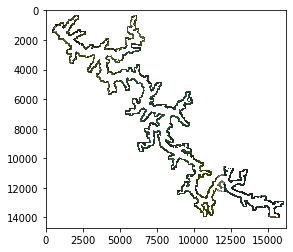

In [ ]:
RoI_addr = 'barra_roi.png'
plt.imshow(cv2.imread(RoI_addr))
plt.show()

## semantic segmentation(manmade and non-manmade)

In [ ]:
net2_output = 'barra_net2_output/'

net2_model.FPN(patches_addr=net2_patches_addr+'rgb/', addr_to_save=net2_output)

### Evaluation

In [ ]:
performance_evaluation.evaluate2(net2_patches_addr,net2_output)

performance :
              precision    recall  f1-score   support

           0     0.9999    0.9999    0.9999  57193359
           1     0.7329    0.7943    0.7623     19569

    accuracy                         0.9998  57212928
   macro avg     0.8664    0.8971    0.8811  57212928
weighted avg     0.9998    0.9998    0.9998  57212928



### Output samples

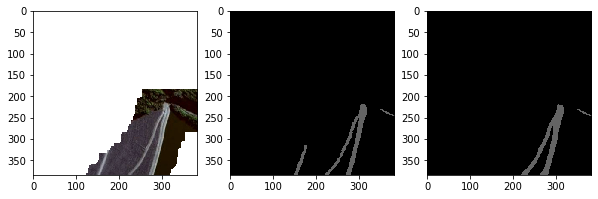

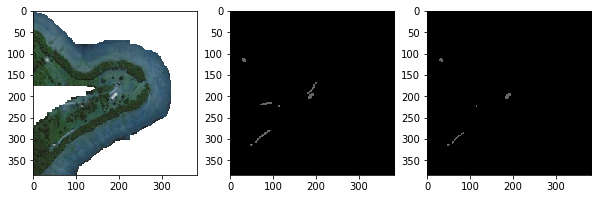

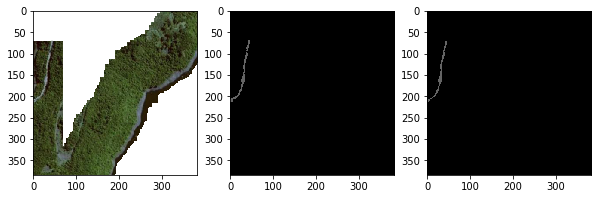

In [ ]:
d = os.listdir(net2_output)
n = [42,127,313]
for i in n:
    if np.max(cv2.imread(net2_output+d[i])) > 0 :

        fig, axs = plt.subplots(1, 3,figsize=(10, 10))

        axs[0].imshow(cv2.imread(net2_patches_addr+'rgb/'+d[i]))
        anno = cv2.imread(net2_patches_addr+'anno/'+d[i])
        anno[:,:,0] = np.floor(anno[:,:,0]/200)
        anno[:,:,1],anno[:,:,2] = anno[:,:,0],anno[:,:,0]
        axs[1].imshow(anno*100)

        axs[2].imshow(cv2.imread(net2_output+d[i])*100)

        plt.show()
